In [66]:
import numpy as np
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import glob

from keras import layers
from keras import models
from keras import optimizers

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
def read_image(image_path):
    """Read and resize individual images - 128x128 for faster processing"""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)
    return img

In [69]:
Data =[]
labels=[]
path = glob.glob('/content/drive/MyDrive/101_ObjectCategories/*')
path = [i + "/*" for i in path]
path = [glob.glob(i) for i in path]
img_dir = np.array([])

for i in path:
  img_dir = np.concatenate((img_dir,i),axis = 0)

for i in tqdm(img_dir):
    im = read_image(i)
    Data.append(im)

Data = np.array(Data)
Data =Data.reshape(len(Data),128,128,3)
X_train = np.array(Data)
labels = np.array(labels)
len(Data)



100%|██████████| 3026/3026 [00:16<00:00, 185.14it/s]


3026

In [70]:
Names=[]
for i in range (len(img_dir)):
    Names.append((img_dir[i].split("/")[5].split("_")[0]))
np.unique(Names)

array(['Faces', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai', 'car',
       'chandelier', 'ketch', 'revolver', 'watch'], dtype='<U10')

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Names)
list(le.classes_)
labels= le.transform(Names)
labels.shape

(3026,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

#making sure array sizes match 70,15,15 split
print(len(X_train))
print(len(X_test))
print(len(X_val))
#Normalization
X_test=X_test.astype(np.float64)/255
X_train=X_train.astype(np.float64)/255
X_val=X_val.astype(np.float64)/255

2118
454
454


In [73]:
X_train,y_train = shuffle(X_train, y_train)
X_test,y_test = shuffle(X_test, y_test)
X_val,y_val = shuffle(X_val, y_val)


In [74]:
len(np.unique(Names))

10

In [75]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.30))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 128)      

In [76]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model.optimizer.get_config())

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [77]:
history=model.fit(X_train, y_train,validation_data= (X_val, y_val), epochs = 25, batch_size= 16, shuffle = True )

Epoch 1/25
133/133 [==============================] - 4s 25ms/step - loss: 1.2578 - accuracy: 0.6138 - val_loss: 0.4174 - val_accuracy: 0.8678
Epoch 2/25
133/133 [==============================] - 3s 20ms/step - loss: 0.2272 - accuracy: 0.9301 - val_loss: 0.2863 - val_accuracy: 0.9119
Epoch 3/25
133/133 [==============================] - 3s 21ms/step - loss: 0.1339 - accuracy: 0.9566 - val_loss: 0.2358 - val_accuracy: 0.9383
Epoch 4/25
133/133 [==============================] - 3s 20ms/step - loss: 0.0633 - accuracy: 0.9831 - val_loss: 0.2129 - val_accuracy: 0.9405
Epoch 5/25
133/133 [==============================] - 3s 21ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.2018 - val_accuracy: 0.9559
Epoch 6/25
133/133 [==============================] - 3s 20ms/step - loss: 0.0311 - accuracy: 0.9888 - val_loss: 0.1623 - val_accuracy: 0.9670
Epoch 7/25
133/133 [==============================] - 3s 20ms/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 0.1851 - val_accuracy: 0.9515

In [78]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 15ms/step - loss: 0.1100 - accuracy: 0.9824


[0.10997869819402695, 0.9823788404464722]

In [79]:
predicted_classes_all = model.predict(X_test)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)
True_classes_all = y_test
print(classification_report(True_classes_all, predicted_classes_all))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       1.00      1.00      1.00        33
           2       1.00      0.99      1.00       122
           3       0.99      1.00      1.00       126
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00        18
           6       0.80      0.80      0.80        10
           7       0.94      0.94      0.94        18
           8       0.91      1.00      0.95        10
           9       0.90      0.93      0.92        30

    accuracy                           0.98       454
   macro avg       0.95      0.96      0.96       454
weighted avg       0.98      0.98      0.98       454



### Vizualization

(1, 63, 63, 32)
(1, 61, 61, 32)
(1, 30, 30, 32)
(1, 28, 28, 128)
(1, 14, 14, 128)
(1, 14, 14, 128)
(1, 25088)
(1, 256)
(1, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


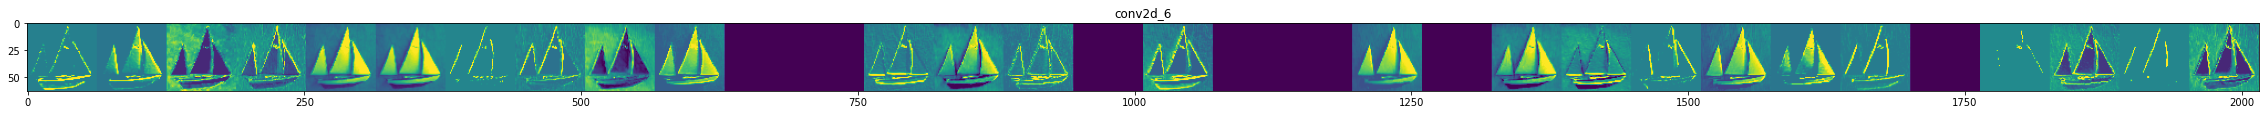

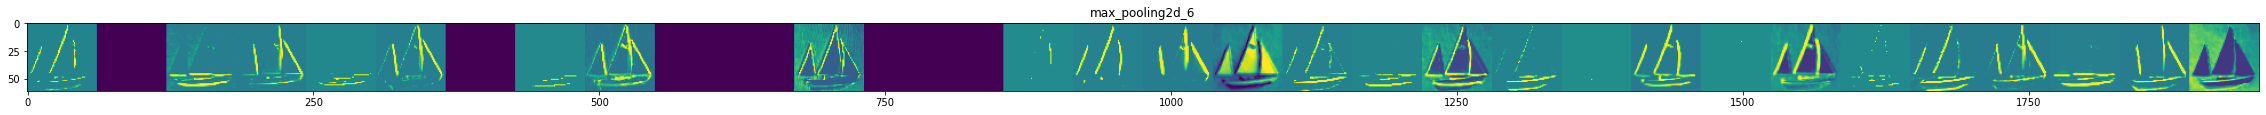

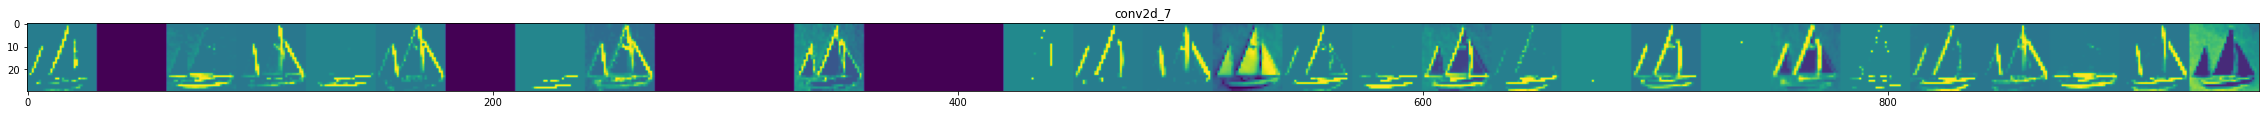

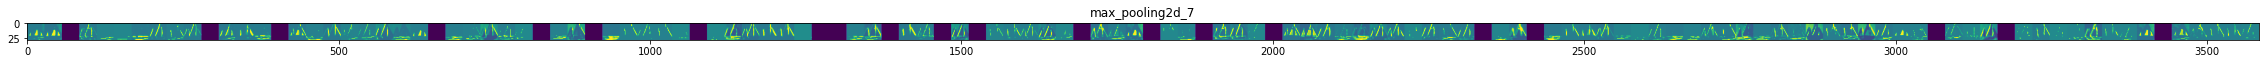

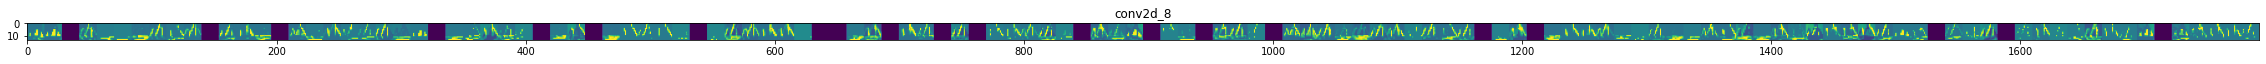

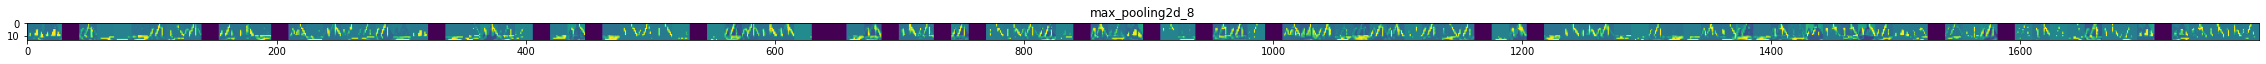

In [80]:

from keras import preprocessing
img_path='/content/drive/MyDrive/101_ObjectCategories/ketch/image_0010.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)#Load the input image
img = read_image(img_path)# Convert ht image to Array of dimension (150,150,3)
x   = preprocessing.image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 40. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

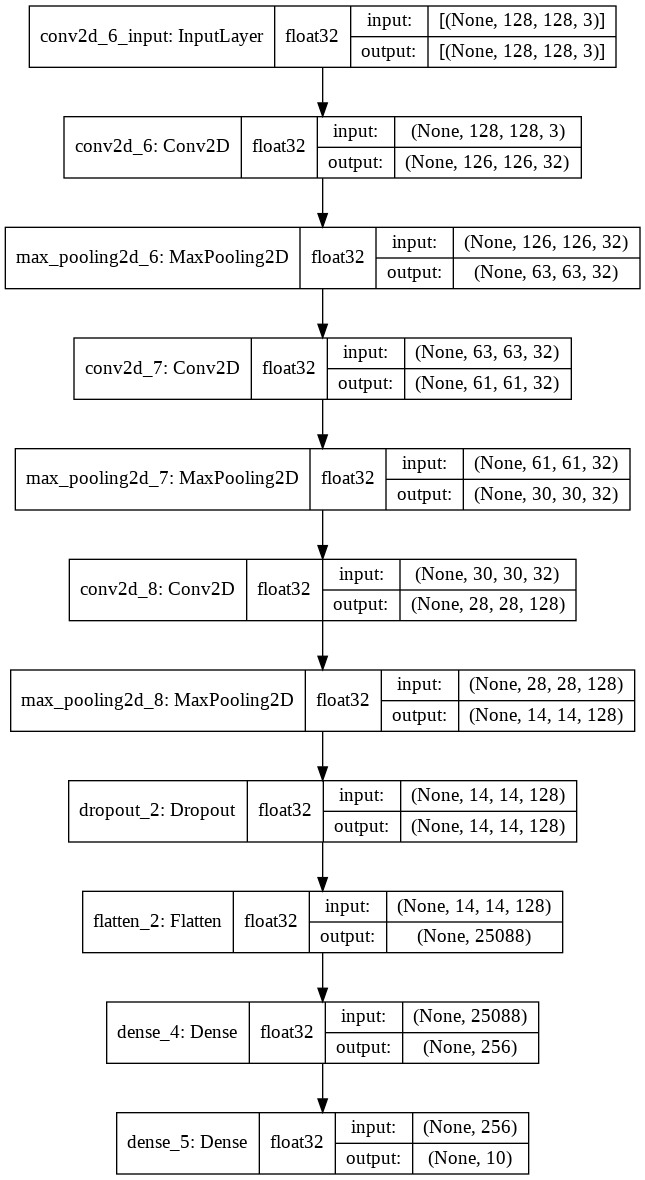

In [81]:
from keras.utils.vis_utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)


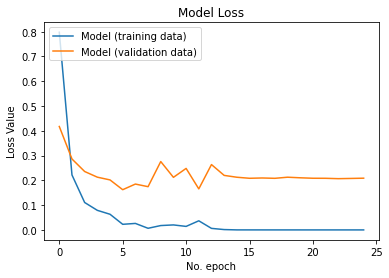

In [82]:
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Some TensorFlow/Keras model


# Plot history: MAE
plt.plot(history.history['loss'], label='Model (training data)')
plt.plot(history.history['val_loss'], label='Model (validation data)')
plt.title('Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

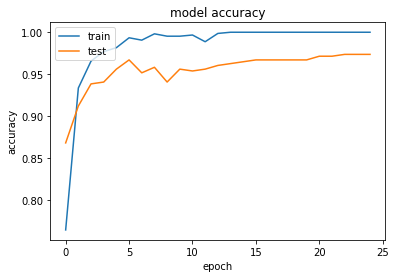

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(True_classes_all, predicted_classes_all)
matrix


array([[ 71,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,  33,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 121,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 126,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  14,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,  18,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,  17,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0,  28]])

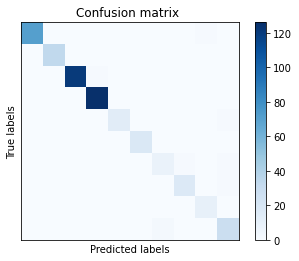

In [85]:
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

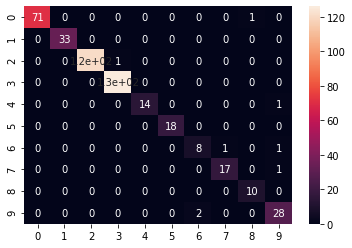

In [86]:
import seaborn as sns

cm = confusion_matrix(True_classes_all, predicted_classes_all)
f = sns.heatmap(cm, annot=True)

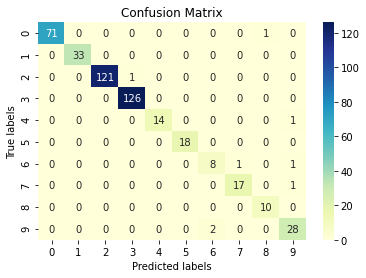

In [87]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="YlGnBu",);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (50,20), fontsize=3):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Greens', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Greens', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

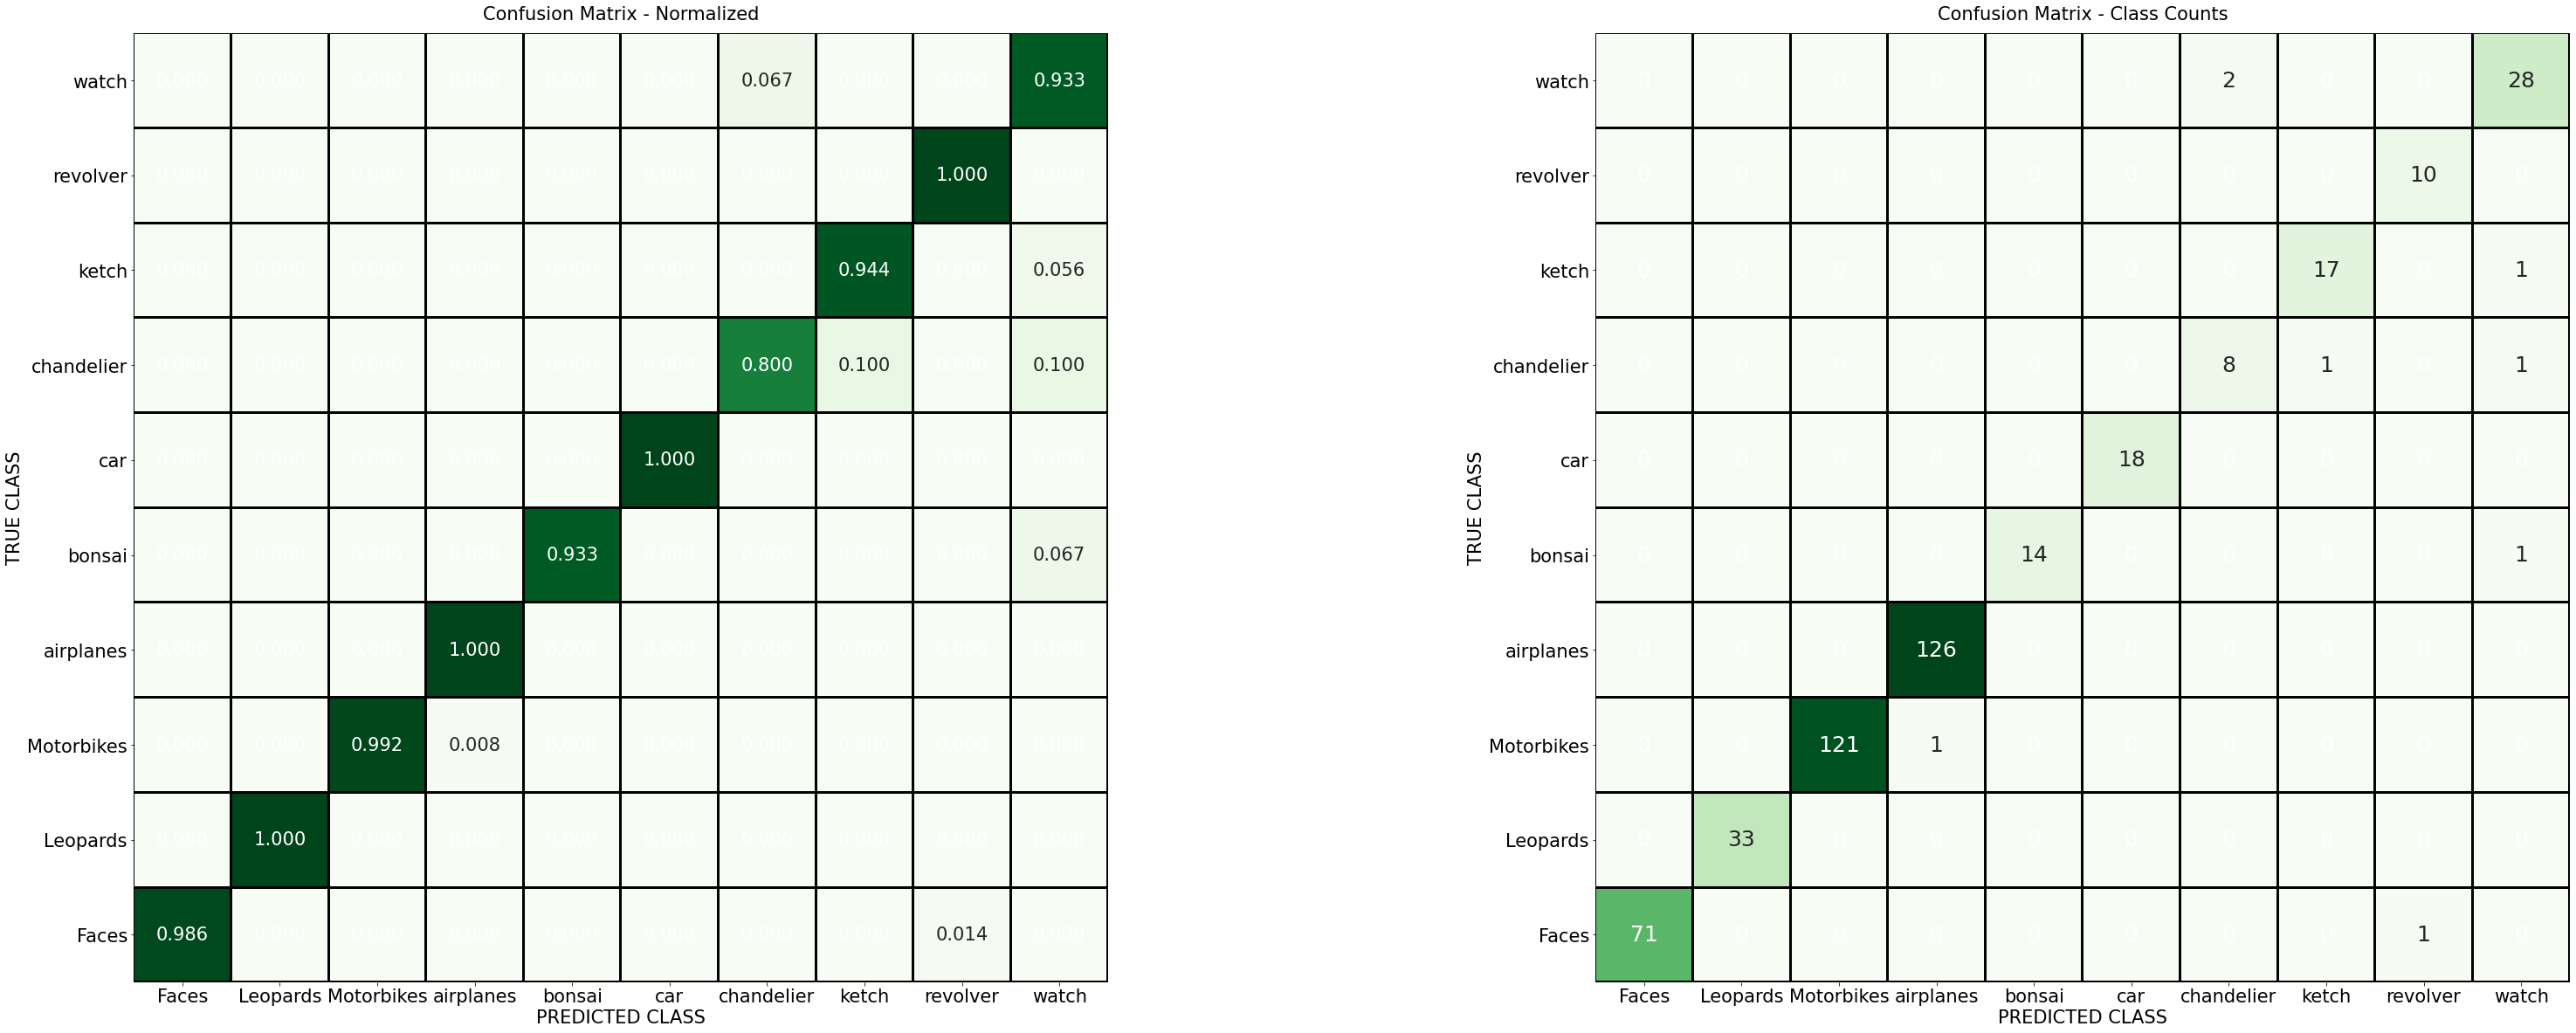

In [89]:
plot_confusion_matrix(confusion_matrix=matrix, class_names=np.unique(Names), errors_only=False, fontsize=21)

In [90]:
#labels=le.inverse_transform(labels)
predicted_classes_all=le.inverse_transform(predicted_classes_all)

In [91]:
predicted_classes_all = model.predict(Data)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)
True_classes_all = labels

In [92]:
import pandas as pd


len(predicted_classes_all)
data = {'Image Name':Names,'Real lables':labels,'Predected Labels':predicted_classes_all}

df = pd.DataFrame(data)

df.to_csv('AllDataPredicted.csv')

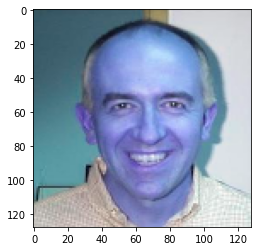

In [93]:
plt.imshow(Data[2088])

In [94]:
#!zip -r /content/my_model97_1.zip /content/model97.h5

In [96]:
model.save("/content/drive/MyDrive/model98.h5/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model98.h5/assets
